<a href="https://colab.research.google.com/github/chandan-m-chandu/Basic-Machine-Learning-Projects-/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program: 6

a.	Program to Learn bias-variance trade-off

b.	Estimate the bias and variance for  linear regression model

c.	Exhibit low bias, high variance model and high bias, low variance model

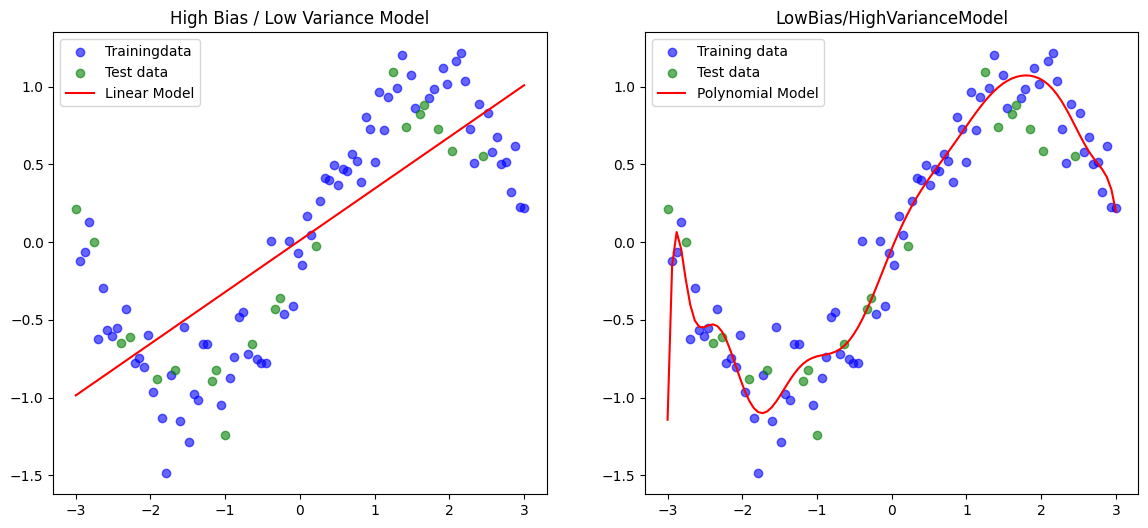

LinearModelTrainingMSE:0.19743335485331392
LinearModelTestingMSE:0.24695224333039673
Polynomial Model Training MSE: 0.029514806989774718
PolynomialModelTestingMSE:0.1425297085836628


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#Generate a synthetic dataset
np.random.seed(0)
X=np.linspace(-3,3, 100)
y=np.sin(X)+np.random.normal(0,0.2,100)
#Adding noise
X = X[:, np.newaxis]
# Reshape for sklearn
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#HighBias/LowVarianceModel(LinearRegression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

# Low Bias / High Variance Model (Polynomial Regression with high degree)
poly_model=make_pipeline(PolynomialFeatures(degree=15),LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_train_poly=poly_model.predict(X_train)
y_pred_test_poly = poly_model.predict(X_test)
# Plotting
plt.figure(figsize=(14,6))

#LinearModelPlot
plt.subplot(1, 2, 1)
plt.scatter(X_train,y_train,label='Trainingdata',color='blue',alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', color='green', alpha=0.6)
plt.plot(X, linear_model.predict(X), color='red', label='Linear Model')
plt.title('High Bias / Low Variance Model')
plt.legend()

#Polynomial Model Plot
plt.subplot(1,2,2)
plt.scatter(X_train, y_train, label='Training data', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', color='green', alpha=0.6)
plt.plot(np.linspace(-3,3,100),poly_model.predict(np.linspace(-3,3,100)[:, np.newaxis]), color='red', label='Polynomial Model')
plt.title('LowBias/HighVarianceModel')
plt.legend()

plt.show()

#PrintMeanSquaredErrorforbothmodels
print(f"LinearModelTrainingMSE:{mean_squared_error(y_train, y_pred_train_linear)}")
print(f"LinearModelTestingMSE:{mean_squared_error(y_test,y_pred_test_linear)}")
print(f"Polynomial Model Training MSE: {mean_squared_error(y_train, y_pred_train_poly)}")
print(f"PolynomialModelTestingMSE:{mean_squared_error(y_test, y_pred_test_poly)}")